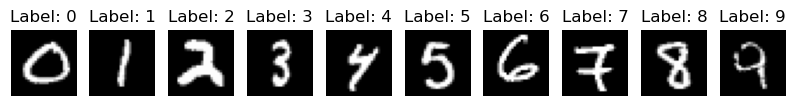

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

np.random.seed(42)

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

subset_X = []
subset_y = []

for i in range(10):
    class_indices = np.where(y == i)[0]
    selected_indices = np.random.choice(class_indices, 1000, replace=False)
    subset_X.append(X[selected_indices])
    subset_y.append(y[selected_indices])

subset_X = np.concatenate(subset_X)
subset_y = np.concatenate(subset_y)

plt.figure(figsize=(10, 2))
for i in range(10):
    class_indices = np.where(subset_y == i)[0]
    random_index = np.random.choice(class_indices)
    plt.subplot(1, 10, i + 1)
    plt.imshow(subset_X[random_index].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {i}")
    plt.axis("off")
plt.show()

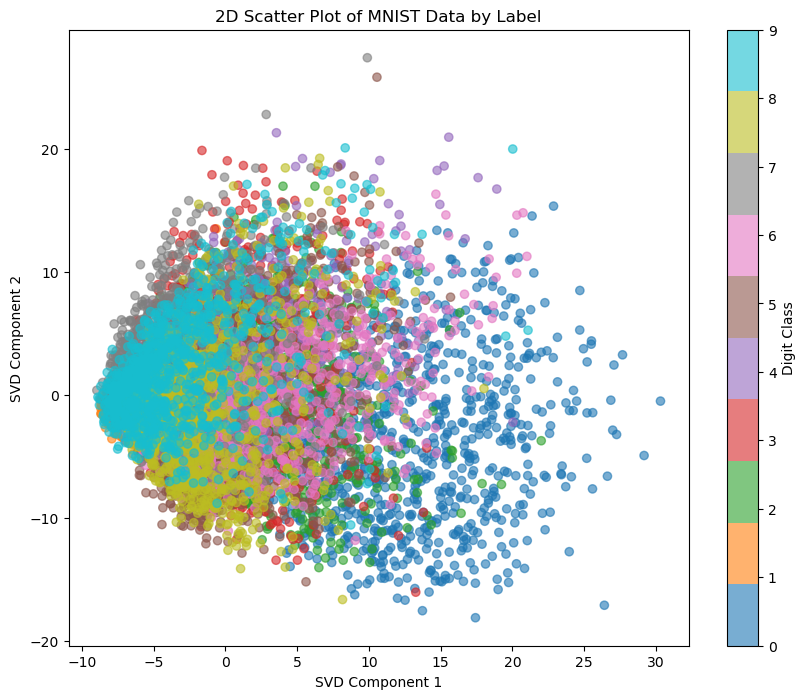

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

scaler = StandardScaler()
X_normalized = scaler.fit_transform(subset_X)

svd = TruncatedSVD(n_components=2, random_state=42)
X_2d = svd.fit_transform(X_normalized)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=subset_y, cmap="tab10", alpha=0.6)
plt.colorbar(scatter, ticks=range(10), label="Digit Class")
plt.title("2D Scatter Plot of MNIST Data by Label")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.show()

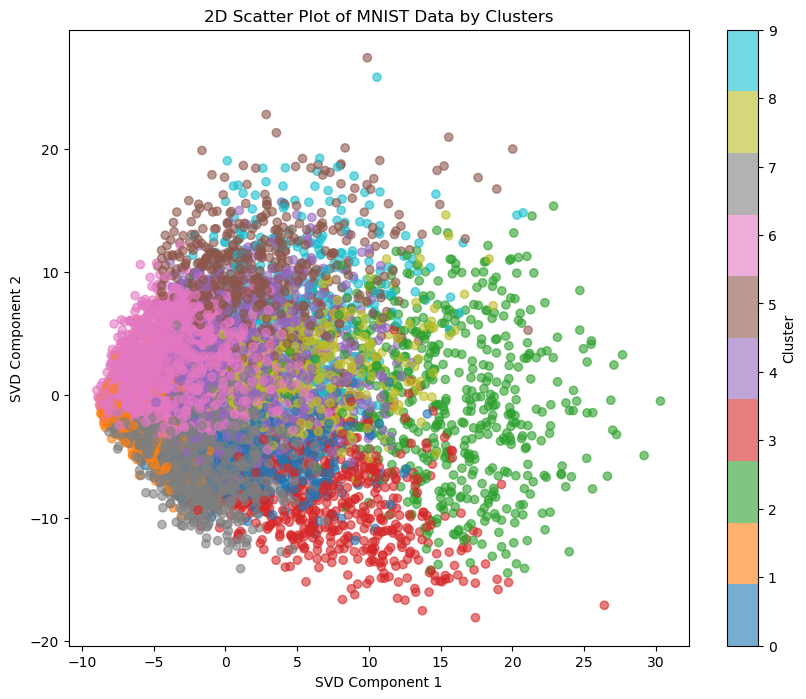

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X_normalized)

X_2d_clustered = svd.transform(X_normalized)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_2d_clustered[:, 0], X_2d_clustered[:, 1], c=clusters, cmap="tab10", alpha=0.6)
plt.colorbar(scatter, ticks=range(10), label="Cluster")
plt.title("2D Scatter Plot of MNIST Data by Clusters")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.show()

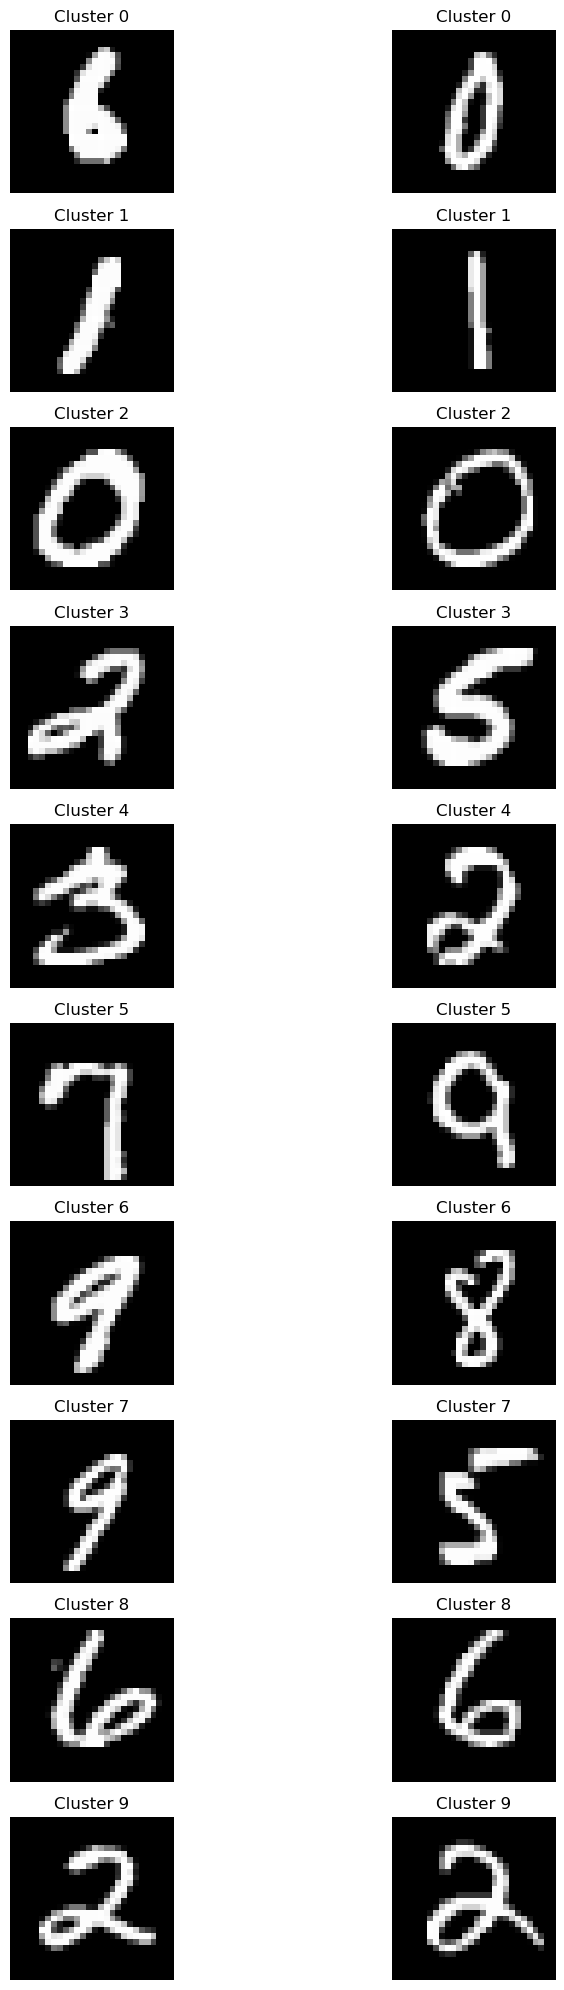

In [4]:
plt.figure(figsize=(10, 20))

for cluster in range(10):
    cluster_indices = np.where(clusters == cluster)[0]
    selected_indices = np.random.choice(cluster_indices, 2, replace=False)

    for i, index in enumerate(selected_indices):
        plt.subplot(10, 2, cluster * 2 + i + 1)
        plt.imshow(subset_X[index].reshape(28, 28), cmap="gray")
        plt.title(f"Cluster {cluster}")
        plt.axis("off")

plt.tight_layout()
plt.show()